In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'D:\DA_Portfolio\Global Condom Sales and Awareness (2015-2025)\Dataset\Rich_Global_Condom_Usage_Dataset.csv')
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='%Y')  
df['Year'] = df['Year'].dt.year


df[['Male Purchases (%)', 'Female Purchases (%)']] = df['Male vs Female Purchases (%)'].str.extract(r'(\d+)% Male - (\d+)% Female')
df = df.drop(columns='Male vs Female Purchases (%)')

df.rename(columns={'Teen Pregnancy Rate (per 1000 teens)': 'Teen Pregnancy Rate (per 10000 teens)'}, inplace=True)

df['Male Purchases (%)'] = pd.to_numeric(df['Male Purchases (%)'], errors='coerce')
df['Female Purchases (%)'] = pd.to_numeric(df['Female Purchases (%)'], errors='coerce')

custom_palette = ['#E63946','#A8DADC', '#457B9D', '#1D3557','#F1FAEE']

- How have Total Sales and Market Revenue changed over the years?

In [4]:
df

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 10000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Brand Dominance,Sex Education Programs (Yes/No),Male Purchases (%),Female Purchases (%)
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,Kamasutra,No,69,39
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,Skyn,No,50,33
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,Skyn,Yes,46,54
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,Manforce,No,49,57
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,Trojan,Yes,40,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2025,Australia,585,876.695845,No,5.53,Textured,77.79,52.35,89.26,20.34,0.48,LifeStyles,Yes,52,60
546,2025,Australia,273,311.965966,Yes,3.43,Textured,48.71,32.15,85.71,15.77,1.96,LifeStyles,No,62,41
547,2025,Australia,994,2787.762423,Yes,5.52,Textured,57.73,63.18,33.34,18.98,1.10,Durex,Yes,45,59
548,2025,Australia,730,938.731002,Yes,6.73,Ultra-Thin,30.33,32.88,61.39,16.43,0.87,Skyn,Yes,72,31


In [5]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 10000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', 'Brand Dominance',
       'Sex Education Programs (Yes/No)', 'Male Purchases (%)',
       'Female Purchases (%)'],
      dtype='object')

In [6]:
Total_sales_years = df.groupby('Year')['Total Sales (Million Units)'].sum().reset_index()
Total_sales_years

,Year,Total Sales (Million Units)
0,2015,54462
1,2016,56427
2,2017,60940
3,2018,57707
4,2019,58696
5,2020,62498
6,2021,63441
7,2022,65563
8,2023,64404
9,2024,66371


In [7]:
Market_Revenue = df.groupby('Year')['Market Revenue (Million USD)'].sum().reset_index()
Market_Revenue

,Year,Market Revenue (Million USD)
0,2015,112116.041223
1,2016,111498.776839
2,2017,121652.645773
3,2018,119982.827527
4,2019,114338.835060
5,2020,124430.527401
6,2021,132132.404558
7,2022,132058.441120
8,2023,138978.587634
9,2024,138854.770344


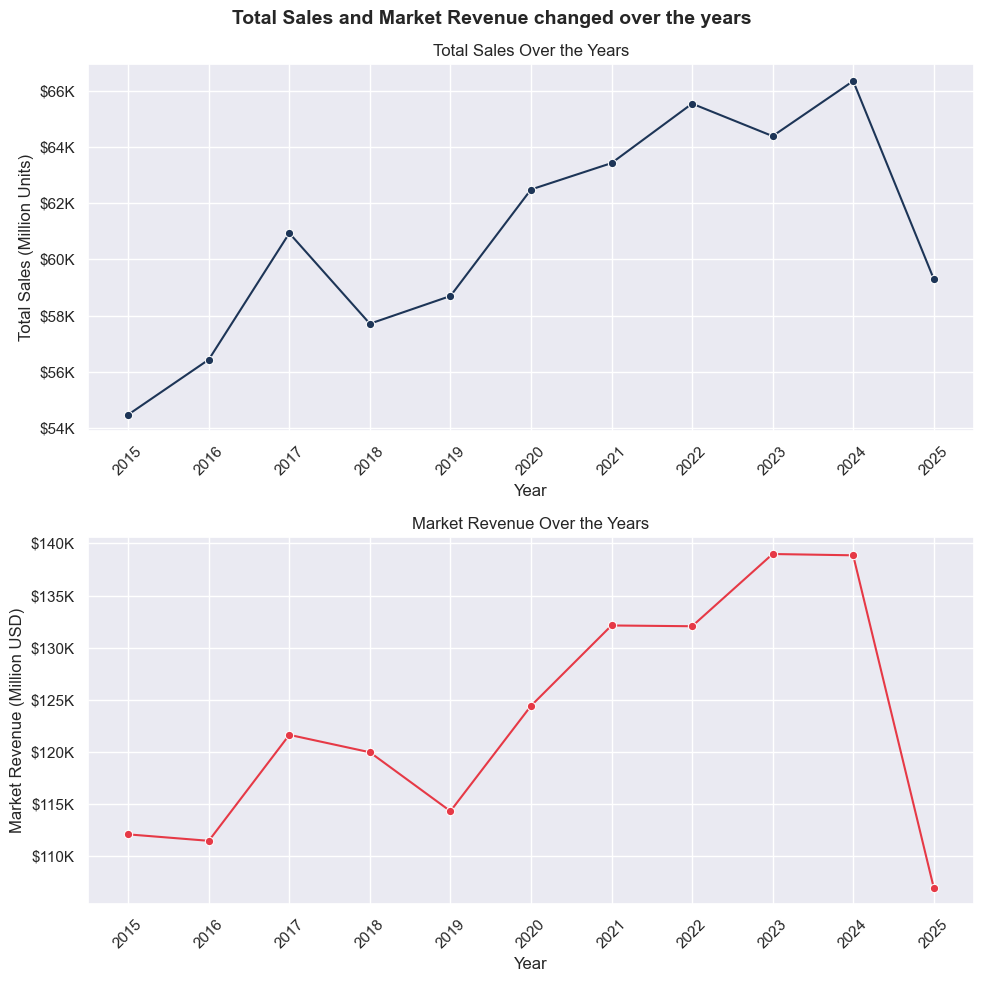

In [22]:
fig, ax = plt.subplots(2,1, figsize=(10, 10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=Total_sales_years, x='Year',y='Total Sales (Million Units)',ax=ax[0],marker='o',color='#1D3557')
ax[0].set_title('Total Sales Over the Years')
ax[0].set_xticks(Total_sales_years['Year'])
ax[0].set_xticklabels(Total_sales_years['Year'], rotation=45)

ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.lineplot(data=Market_Revenue, x='Year',y='Market Revenue (Million USD)',ax=ax[1],marker='o',color='#E63946')
ax[1].set_title('Market Revenue Over the Years')
ax[1].set_xticks(Market_Revenue['Year'])
ax[1].set_xticklabels(Market_Revenue['Year'], rotation=45)

ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
fig.suptitle('Total Sales and Market Revenue changed over the years', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()